In [ ]:
import numpy as np
from IPython.display import display, Math

def cosh(x):
    return np.cosh(x)

def sinh(x):
    return np.sinh(x)

def tanh(x):
    return np.tanh(x)

def acosh(x):
    return np.arccosh(x)

In [ ]:
#first: k_o vs margin

#set parameters:
def set_parameters(n_val, p_val, q_val):
    global n, k_o, k_s, alpha, alpha_prime, p, q, c_var, lamb_val
    # Set variables globally
    n = n_val
    p = p_val
    q = q_val

#check parameters:
def check_parameters():
    print(f"n = {n}")
    print(f"p = {p}")
    print(f"q = {q}")

set_parameters(n_val=7, p_val=5, q_val=3)   
check_parameters()

def rank_original(j, k_o):
    alpha = 1 - 2 * (k_o/1)
    lamb = acosh(1/(1-alpha))
    rank_original = sinh(((n+1)/2 - j) * lamb) / ( sinh(((n+1)/2) * lamb) - sinh(((n-1)/2) * lamb) )
    return rank_original


def get_c(k_o):
    alpha = 1 - 2 * (k_o/1)
    lamb = acosh(1/(1-alpha))
    alpha_prime = k_o / 1
    num = 1 + (
        (sinh(((n + 1) / 2 - q) * lamb) - sinh(((n + 1) / 2 - p) * lamb)) 
        / (sinh(((n + 1) / 2) * lamb) - sinh(((n - 1) / 2) * lamb))
    )
    D_sim = (
        (cosh((q - 1 / 2) * lamb) * sinh((n - ((p + q) / 2 - 1 / 2)) * lamb)) +
        (cosh((n - p + 1 / 2) * lamb) * sinh(((p + q) / 2 - 1 / 2) * lamb))
    )
    denom = ( 1 - 2*alpha_prime 
        - (4 * (1 / (2 * cosh(lamb))) * ( (tanh(lamb / 2)) / sinh(lamb * n) ) * sinh( ((q-p)/2) * lamb) * D_sim ) 
    )
    return num/denom

def D_ij_analytical_sol_trend3(i, j, k_o):
    alpha = 1 - 2 * (k_o/1)
    lamb = acosh(1/(1-alpha))
    num = 2 * cosh( (min(i,j)-1/2) * lamb ) * cosh( (n-(max(i,j)-1/2)) * lamb) * tanh(lamb/2)
    denom = sinh(lamb * n)
    return num/denom

def rank_diff(j, k_o):
    alpha = 1 - 2 * (k_o/1)
    lamb = acosh(1/(1-alpha))
    alpha_prime = k_o / 1
    rank_diff = get_c(k_o) * alpha_prime * (D_ij_analytical_sol_trend3(j, p, k_o) - D_ij_analytical_sol_trend3(j, q, k_o))
    return rank_diff

def rank(j, k_o): 
    return rank_original(j, k_o) + rank_diff(j, k_o)

def margin(j, k, k_o):
    return rank(j, k_o) - rank(k, k_o)


n = 7
p = 5
q = 3


In [ ]:
# #parameters
# k_o = 0.4
# k_d = 0
# k_s = 1
# alpha_prime = k_o/k_s
# alpha = 1 - 2 * ((k_o-k_d)/(k_s-k_d))
# p = 5
# q = 2
# n = 7
# j = 5

In [ ]:
#first verify with the above parameters that the formula is correct.  
# get_c(0.4) #verified
# j = 5
# D_ij_analytical_sol_trend3(j, q, 0.4) #verified
# D_ij_analytical_sol_trend3(j, p, 0.4) #verified
# print(get_c(0.4) * 0.4 * (D_ij_analytical_sol_trend3(j, q, 0.4) - D_ij_analytical_sol_trend3(j, p, 0.4))) #verified
# rank_diff(j, 0.4) #verified

set_parameters(n_val=13, p_val=9, q_val=7)   

for i in range(1, n+1):
    print(rank(i, 0.1))

0.11237233735157265
0.011351036164152966
0.0011380242899568938
2.9206735415982822e-05
-0.0008459569357970664
-0.008488776093386639
-0.08404180399806939
-1.1701712223837574e-06
0.08403010228584526
0.008374099313591284
-0.00028910914993232227
-0.011265190812914527
-0.11236279897921282


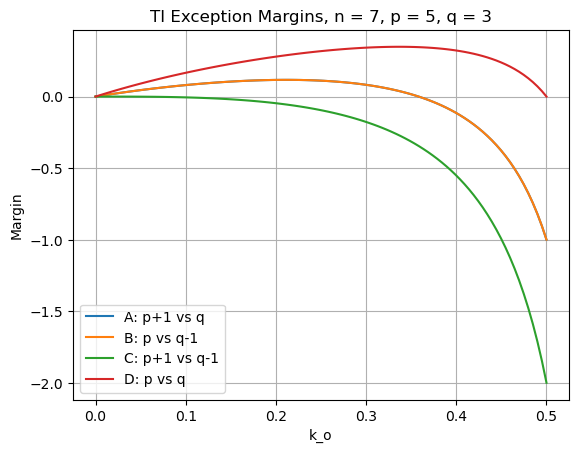

In [ ]:
#status:
# A: p+1 vs q
# B: p vs q-1
# C: q-1 vs p+1
# D: p vs q

p = 5
q = 3
n = 7
k_o = 0.4

k_o_array = np.linspace(0.00000000001, 0.49999999, 100)
margin_A = np.zeros(100)
margin_B = np.zeros(100)
margin_C = np.zeros(100)
margin_D = np.zeros(100)
for i in range(100):
    margin_A[i] = margin(p+1, q, k_o_array[i])
    margin_B[i] = margin(p, q-1, k_o_array[i])
    margin_C[i] = margin(p+1, q-1, k_o_array[i])
    margin_D[i] = margin(p, q, k_o_array[i])
    

import matplotlib.pyplot as plt
plt.plot(k_o_array, margin_A, label='A: p+1 vs q')
plt.plot(k_o_array, margin_B, label='B: p vs q-1')
plt.plot(k_o_array, margin_C, label='C: p+1 vs q-1')
plt.plot(k_o_array, margin_D, label='D: p vs q')
plt.legend()
plt.title(f'TI Exception Margins, n = 7, exception pair E > C')
plt.xlabel('k_o')
plt.ylabel('Margin')
plt.grid(True)



plt.show()

In [ ]:
#margin A and B are equal
assert np.array_equal(margin_A[i], margin_B[i])
print('margin A and B are equal')



margin A and B are equal


4


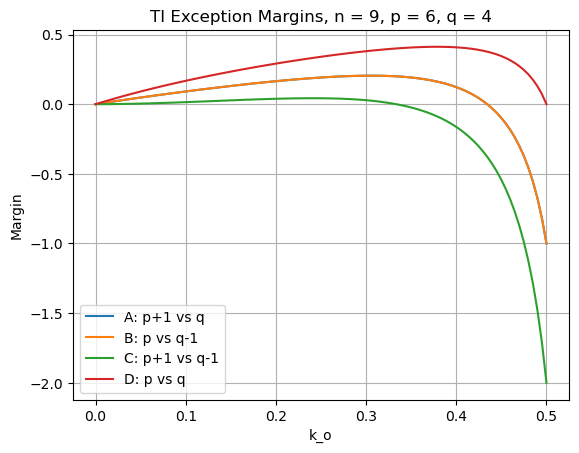

In [ ]:
set_parameters(n_val=9, p_val=6, q_val=4)   
print(q)

k_o_array = np.linspace(0.00000000001, 0.49999999, 100)
margin_A = np.zeros(100)
margin_B = np.zeros(100)
margin_C = np.zeros(100)
margin_D = np.zeros(100)
for i in range(100):
    margin_A[i] = margin(p+1, q, k_o_array[i])
    margin_B[i] = margin(p, q-1, k_o_array[i])
    margin_C[i] = margin(p+1, q-1, k_o_array[i])
    margin_D[i] = margin(p, q, k_o_array[i])
    

import matplotlib.pyplot as plt
plt.plot(k_o_array, margin_A, label='A: p+1 vs q')
plt.plot(k_o_array, margin_B, label='B: p vs q-1')
plt.plot(k_o_array, margin_C, label='C: p+1 vs q-1')
plt.plot(k_o_array, margin_D, label='D: p vs q')
plt.legend()
plt.title(f'TI Exception Margins, n = {n}, p = {p}, q = {q}')
plt.xlabel('k_o')
plt.ylabel('Margin')
plt.grid(True)
plt.show()

In [ ]:
print(q)
print(q-1)
rank(q-1, 0.4) 

4
3


0.08163265306122439

In [ ]:
rank(5, 0.4)

0.0

In [ ]:
#margin A and B are equal
assert np.array_equal(margin_A[i], margin_B[i])
print('margin A and B are equal')

margin A and B are equal


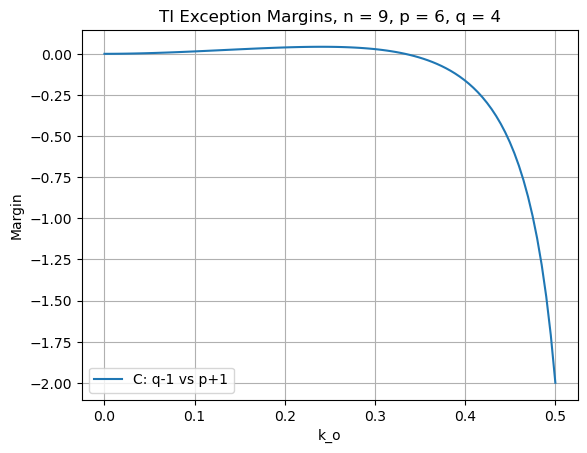

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_o_array, margin_C, label='C: q-1 vs p+1')
plt.legend()
plt.title(f'TI Exception Margins, n = {n}, p = {p}, q = {q}')
plt.xlabel('k_o')
plt.ylabel('Margin')
plt.grid(True)
plt.show()

In [ ]:
margin(q-1, p+1, 0.3)

-0.028526148969889212

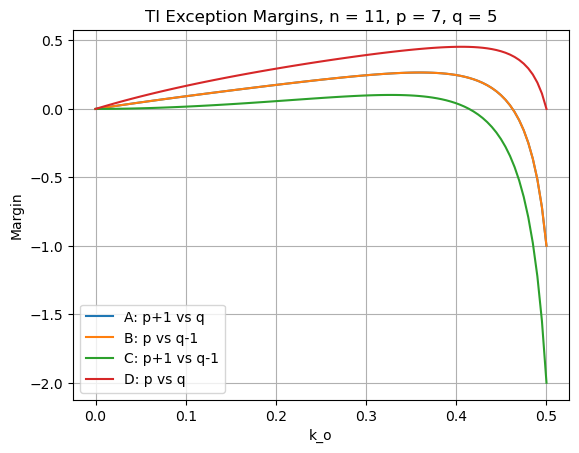

In [ ]:
p = 7
q = 5
n = 11
k_o = 0.4


k_o_array = np.linspace(0.00000000001, 0.49999999, 100)
margin_A = np.zeros(100)
margin_B = np.zeros(100)
margin_C = np.zeros(100)
margin_D = np.zeros(100)
for i in range(100):
    margin_A[i] = margin(p+1, q, k_o_array[i])
    margin_B[i] = margin(p, q-1, k_o_array[i])
    margin_C[i] = margin(p+1, q-1, k_o_array[i])
    margin_D[i] = margin(p, q, k_o_array[i])
    

import matplotlib.pyplot as plt
plt.plot(k_o_array, margin_A, label='A: p+1 vs q')
plt.plot(k_o_array, margin_B, label='B: p vs q-1')
plt.plot(k_o_array, margin_C, label='C: p+1 vs q-1')
plt.plot(k_o_array, margin_D, label='D: p vs q')
plt.legend()
plt.title(f'TI Exception Margins, n = {n}, p = {p}, q = {q}')
plt.xlabel('k_o')
plt.ylabel('Margin')
plt.grid(True)
plt.show()

In [ ]:
#margin A and B are equal
assert np.array_equal(margin_A[i], margin_B[i])
print('margin A and B are equal')




margin A and B are equal


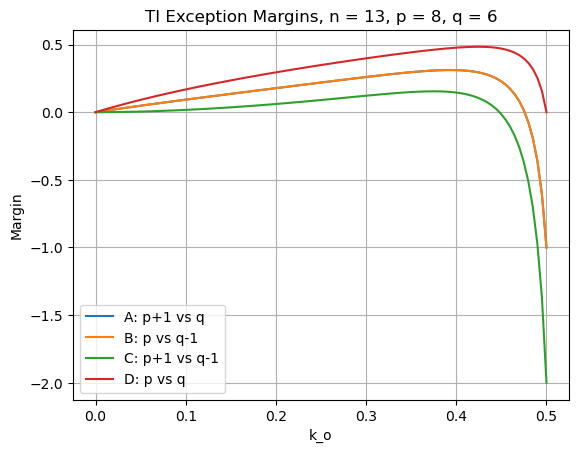

In [ ]:
p = 8
q = 6
n = 13
k_o = 0.4


k_o_array = np.linspace(0.00000000001, 0.49999999, 100)
margin_A = np.zeros(100)
margin_B = np.zeros(100)
margin_C = np.zeros(100)
margin_D = np.zeros(100)
for i in range(100):
    margin_A[i] = margin(p+1, q, k_o_array[i])
    margin_B[i] = margin(p, q-1, k_o_array[i])
    margin_C[i] = margin(p+1, q-1, k_o_array[i])
    margin_D[i] = margin(p, q, k_o_array[i])
    

import matplotlib.pyplot as plt
plt.plot(k_o_array, margin_A, label='A: p+1 vs q')
plt.plot(k_o_array, margin_B, label='B: p vs q-1')
plt.plot(k_o_array, margin_C, label='C: p+1 vs q-1')
plt.plot(k_o_array, margin_D, label='D: p vs q')
plt.legend()
plt.title(f'TI Exception Margins, n = {n}, p = {p}, q = {q}')
plt.xlabel('k_o')
plt.ylabel('Margin')
plt.grid(True)
plt.show()

In [ ]:
#margin A and B are equal
assert np.array_equal(margin_A[i], margin_B[i])
print('margin A and B are equal')

margin A and B are equal


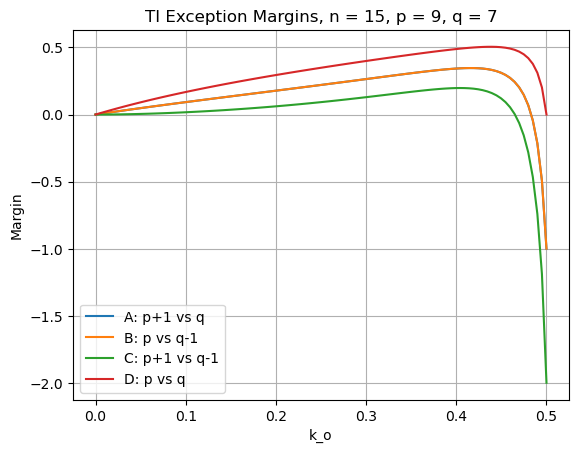

In [ ]:
p = 9
q = 7
n = 15
k_o = 0.4


k_o_array = np.linspace(0.00000000001, 0.49999999, 100)
margin_A = np.zeros(100)
margin_B = np.zeros(100)
margin_C = np.zeros(100)
margin_D = np.zeros(100)
for i in range(100):
    margin_A[i] = margin(p+1, q, k_o_array[i])
    margin_B[i] = margin(p, q-1, k_o_array[i])
    margin_C[i] = margin(p+1, q-1, k_o_array[i])
    margin_D[i] = margin(p, q, k_o_array[i])
    

import matplotlib.pyplot as plt
plt.plot(k_o_array, margin_A, label='A: p+1 vs q')
plt.plot(k_o_array, margin_B, label='B: p vs q-1')
plt.plot(k_o_array, margin_C, label='C: p+1 vs q-1')
plt.plot(k_o_array, margin_D, label='D: p vs q')
plt.legend()
plt.title(f'TI Exception Margins, n = {n}, p = {p}, q = {q}')
plt.xlabel('k_o')
plt.ylabel('Margin')
plt.grid(True)
plt.show()

In [ ]:
#margin A and B are equal
assert np.array_equal(margin_A[i], margin_B[i])
print('margin A and B are equal')

margin A and B are equal


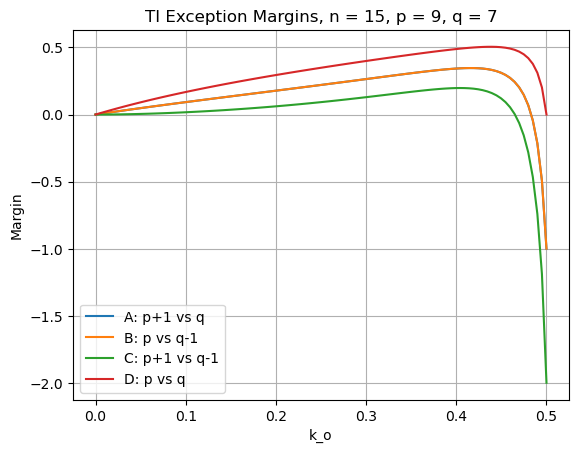

In [ ]:
p = 9
q = 7
n = 15
k_o = 0.4


k_o_array = np.linspace(0.00000000001, 0.49999999, 100)
margin_A = np.zeros(100)
margin_B = np.zeros(100)
margin_C = np.zeros(100)
margin_D = np.zeros(100)
for i in range(100):
    margin_A[i] = margin(p+1, q, k_o_array[i])
    margin_B[i] = margin(p, q-1, k_o_array[i])
    margin_C[i] = margin(p+1, q-1, k_o_array[i])
    margin_D[i] = margin(p, q, k_o_array[i])
    

import matplotlib.pyplot as plt
plt.plot(k_o_array, margin_A, label='A: p+1 vs q')
plt.plot(k_o_array, margin_B, label='B: p vs q-1')
plt.plot(k_o_array, margin_C, label='C: p+1 vs q-1')
plt.plot(k_o_array, margin_D, label='D: p vs q')
plt.legend()
plt.title(f'TI Exception Margins, n = {n}, p = {p}, q = {q}')
plt.xlabel('k_o')
plt.ylabel('Margin')
plt.grid(True)
plt.show()

In [ ]:
#margin A and B are equal
assert np.array_equal(margin_A[i], margin_B[i])
print('margin A and B are equal')

margin A and B are equal
